# WeatherPy
----

In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from api_key import api_key
from citipy import citipy

#output
output_file = "output/cities_output.csv"

#latitude/longitude ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#empty lists
locations = []
cities = []

#random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lat_range[0], high=lng_range[1], size=1500)
locations = zip(lats, lngs)

#nearest city for each lat, lng
for location in locations:
    
    #city/country names
    city = citipy.nearest_city(location[0], location[1]).city_name + ',' + citipy.nearest_city(location[0], location[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#city length
len(cities)

641

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#urls
url_base = "http://api.openweathermap.org/data/2.5/weather?q="
url_query = url_base + cities[1] + '&units=imperial&apikey=' + api_key

#request test
req = requests.get(url_query).json()
req

{'coord': {'lon': -68.31, 'lat': -54.81},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 39.2,
  'pressure': 993,
  'humidity': 80,
  'temp_min': 39.2,
  'temp_max': 39.2},
 'visibility': 10000,
 'wind': {'speed': 17.22, 'deg': 230},
 'clouds': {'all': 75},
 'dt': 1564351057,
 'sys': {'type': 1,
  'id': 8303,
  'message': 0.0065,
  'country': 'AR',
  'sunrise': 1564316978,
  'sunset': 1564346976},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

In [4]:
#empty lists/count for loop
names = []
country = []
dates = []
temps = []
cloudiness = []
humidity = []
wind_speed = []
latitude = []
longitude = []
count = 0

#begin retrieval loop
print('Performing Data Retrieval')
print('------------------------------')

for city in cities:
    try:
        
        #url/request
        url_query = url_base + city + '&units=imperial&apikey=' + api_key
        req = requests.get(url_query).json()
        
        #values needed for df
        val_name = req['name']
        val_country = req['sys']['country']
        val_date = req['dt']
        val_maxtemp = req['main']['temp_max']
        val_cloud = req['clouds']['all']
        val_humid = req['main']['humidity']
        val_wind = req['wind']['speed']
        val_lat = req['coord']['lat']
        val_lng = req['coord']['lon']
        
        #append values to lists
        names.append(val_name)
        country.append(val_country)
        dates.append(val_date)
        temps.append(val_maxtemp)
        cloudiness.append(val_cloud)
        humidity.append(val_humid)
        wind_speed.append(val_wind)
        latitude.append(val_lat)
        longitude.append(val_lng)        
        
        #increment count for display
        count = count+1
        print(f"Recording data for {count} of {len(cities)} | {city}")
    
    #exception for keyerror if not in OW database
    except KeyError:
        count = count+1
        print(f'City by the name of {city} not found in OpenWeather database. Skipping...')

print('------------------------------')
print(f'Data Retrieval complete: recorded data for {len(names)} of {count} cities')

Performing Data Retrieval
------------------------------
City by the name of saint anthony,ca not found in OpenWeather database. Skipping...
Recording data for 2 of 641 | ushuaia,ar
City by the name of illoqqortoormiut,gl not found in OpenWeather database. Skipping...
Recording data for 4 of 641 | hobart,au
Recording data for 5 of 641 | leningradskiy,ru
Recording data for 6 of 641 | saint-philippe,re
Recording data for 7 of 641 | korsakov,ru
Recording data for 8 of 641 | vao,nc
Recording data for 9 of 641 | mahebourg,mu
Recording data for 10 of 641 | henties bay,na
Recording data for 11 of 641 | new norfolk,au
Recording data for 12 of 641 | albany,au
Recording data for 13 of 641 | esperance,au
Recording data for 14 of 641 | maniwaki,ca
City by the name of lasa,cn not found in OpenWeather database. Skipping...
Recording data for 16 of 641 | axim,gh
Recording data for 17 of 641 | chapais,ca
Recording data for 18 of 641 | hermanus,za
Recording data for 19 of 641 | busselton,au
Recording d

Recording data for 171 of 641 | poum,nc
Recording data for 172 of 641 | walvis bay,na
Recording data for 173 of 641 | malabo,gq
Recording data for 174 of 641 | harsin,ir
Recording data for 175 of 641 | qostanay,kz
Recording data for 176 of 641 | formosa,br
Recording data for 177 of 641 | te anau,nz
Recording data for 178 of 641 | kaseda,jp
Recording data for 179 of 641 | dandong,cn
Recording data for 180 of 641 | jega,ng
Recording data for 181 of 641 | camacha,pt
Recording data for 182 of 641 | marystown,ca
Recording data for 183 of 641 | sao filipe,cv
City by the name of burica,pa not found in OpenWeather database. Skipping...
City by the name of asau,tv not found in OpenWeather database. Skipping...
Recording data for 186 of 641 | hilotongan,ph
Recording data for 187 of 641 | bratsk,ru
City by the name of acarau,br not found in OpenWeather database. Skipping...
Recording data for 189 of 641 | sola,vu
City by the name of sentyabrskiy,ru not found in OpenWeather database. Skipping...
C

Recording data for 339 of 641 | sembe,cg
Recording data for 340 of 641 | khasan,ru
Recording data for 341 of 641 | chiang mai,th
Recording data for 342 of 641 | naze,jp
Recording data for 343 of 641 | takoradi,gh
Recording data for 344 of 641 | clarence town,bs
Recording data for 345 of 641 | nishihara,jp
Recording data for 346 of 641 | petropavlovsk-kamchatskiy,ru
Recording data for 347 of 641 | imbituba,br
Recording data for 348 of 641 | methoni,gr
Recording data for 349 of 641 | harper,lr
Recording data for 350 of 641 | obo,cf
Recording data for 351 of 641 | senador guiomard,br
City by the name of daxian,cn not found in OpenWeather database. Skipping...
Recording data for 353 of 641 | nhulunbuy,au
Recording data for 354 of 641 | agirish,ru
Recording data for 355 of 641 | peqin,al
Recording data for 356 of 641 | kindu,cd
Recording data for 357 of 641 | gravdal,no
Recording data for 358 of 641 | korla,cn
Recording data for 359 of 641 | usinsk,ru
Recording data for 360 of 641 | turukha

Recording data for 512 of 641 | kalmunai,lk
Recording data for 513 of 641 | mpigi,ug
Recording data for 514 of 641 | cerrito,py
Recording data for 515 of 641 | el cobre,cu
Recording data for 516 of 641 | saurimo,ao
City by the name of kamenskoye,ru not found in OpenWeather database. Skipping...
Recording data for 518 of 641 | sinnamary,gf
Recording data for 519 of 641 | taybad,ir
Recording data for 520 of 641 | genk,be
City by the name of codrington,ag not found in OpenWeather database. Skipping...
Recording data for 522 of 641 | tsuyama,jp
Recording data for 523 of 641 | antofagasta,cl
Recording data for 524 of 641 | luanda,ao
City by the name of higuey,do not found in OpenWeather database. Skipping...
Recording data for 526 of 641 | atherton,au
Recording data for 527 of 641 | basco,ph
Recording data for 528 of 641 | tramore,ie
Recording data for 529 of 641 | itarema,br
Recording data for 530 of 641 | nador,ma
Recording data for 531 of 641 | krasnovishersk,ru
Recording data for 532 of

## Convert Raw Data to DataFrame
* export to csv and display df

In [5]:
#data dict
data_weather = {
    'City': names,
    'Country': country,
    'Date': dates,
    'Max Temperature': temps,
    'Cloudiness': cloudiness,
    'Humidity': humidity,
    'Wind Speed': wind_speed,
    'Latitude': latitude,
    'Longitude': longitude
}

#construct dataframe
df_cities = pd.DataFrame(data_weather)

#convert unix to readable time
df_cities['Date'] = df_cities['Date'].map(time.ctime)

#remove potential errors (OW returned a 300+ value for humidity)
df_cities = df_cities.loc[df_cities['Humidity'] <= 100]

#display
df_cities.head()

,City,Country,Date,Max Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
0,Ushuaia,AR,Sun Jul 28 14:57:37 2019,39.20,75,80,17.22,-54.81,-68.31
1,Hobart,AU,Sun Jul 28 15:00:23 2019,48.20,75,81,2.24,-42.88,147.33
2,Leningradskiy,RU,Sun Jul 28 15:02:26 2019,43.61,58,86,3.53,69.38,178.42
3,Saint-Philippe,RE,Sun Jul 28 15:02:27 2019,73.40,40,94,5.82,-21.36,55.77
4,Korsakov,RU,Sun Jul 28 15:02:27 2019,66.20,90,93,11.18,46.63,142.78


In [6]:
#export to csv
df_cities.to_csv(output_file)

In [7]:
#further date conversion/strip for plots
d = df_cities['Date']
d = time.ctime()
d = time.strftime('%Y-%m-%d')
d

'2019-07-28'

# Plots
* label/save as png

### World plot
* quick visualisation of cities to see representation

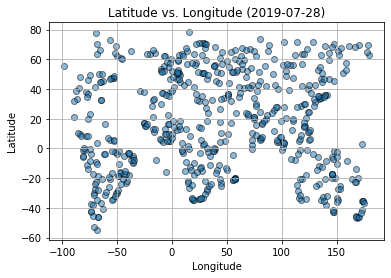

In [8]:
#world visualisation
plt.scatter(longitude, latitude, edgecolor='k', alpha=0.5)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Latitude vs. Longitude ({d})')
plt.show()

### Latitude vs. Temperature

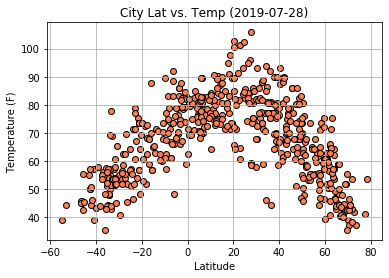

In [91]:
#construct fig
plt.scatter(df_cities['Latitude'], df_cities['Max Temperature'], edgecolors='k', c='coral', alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Lat vs. Temp ({d})')

#save
plt.savefig('output/lat_temp.png', dpi=100, facecolor='floralwhite', edgecolor='k',
        orientation='portrait')

#show
plt.show()

### Latitude vs. Humidity

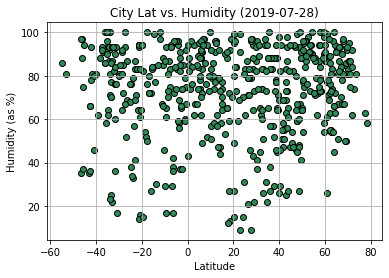

In [92]:
#construct fig
plt.scatter(df_cities['Latitude'], df_cities['Humidity'], edgecolors='k', c='seagreen')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (as %)')
plt.title(f'City Lat vs. Humidity ({d})')

#save
plt.savefig('output/lat_humid.png', dpi=100, facecolor='floralwhite', edgecolor='k',
        orientation='portrait')

#show fig
plt.show()

### Latitude vs. Cloudiness

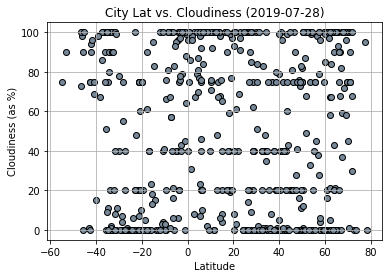

In [93]:
#construct fig
plt.scatter(df_cities['Latitude'], df_cities['Cloudiness'], edgecolors='k', c='lightslategrey')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (as %)')
plt.title(f'City Lat vs. Cloudiness ({d})')

#save
plt.savefig('output/lat_cloudiness.png', dpi=100, facecolor='floralwhite', edgecolor='k',
        orientation='portrait')

#show fig
plt.show()

### Latitude vs. Wind Speed

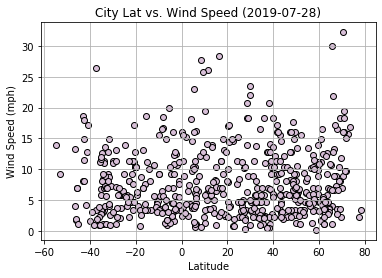

In [95]:
#construct fig
plt.scatter(df_cities['Latitude'], df_cities['Wind Speed'], edgecolors='k', c='thistle')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Lat vs. Wind Speed ({d})')

#save
plt.savefig('output/lat_wind.png', dpi=100, facecolor='floralwhite', edgecolor='k',
        orientation='portrait')

#show fig
plt.show()